<a href="https://colab.research.google.com/github/chrisvanrijn/Angular-spectrum-python/blob/master/Apophis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
%% Angular spectrum propagation method
clear all; close all;


%% Definitions
N=1000;
Nz=1000;
lambda=630*10^-9;
Ih1=ones(1,N);
If=zeros(N,Nz);
Lx=250*lambda;
dx=Lx/N; %sample interval
k=2*pi/lambda; %wavenumber
fx=-1/(2*dx):1/Lx:1/(2*dx)-1/Lx; %freq
t=linspace(-N/2,N/2-1,N);
t=t*dx;


%% Sine input
% p=Lx/50;
% f=1/p;
% t=1+cos(2*pi*t*f);


%% Generate pulse train
% p=Lx/2;
% f=1/p;
% dr=20;
% pulsewidth = p/15;
% pulseperiods = p*linspace(-N/2,N/2-1,N);
% t = pulstran(t,pulseperiods,@rectpuls,pulsewidth)/10;
% Ih1=t;
% Ih1=t.*linspace(0,dr,N);


%% Two sources as inout
% p=30*dx;
% pulsewidth = 7;
% ds=40;
%
% Ih1=zeros(size(Ih1));
% Ih1(end/2-ds:end/2-ds+pulsewidth)=1;
% Ih1(end/2+ds:end/2+ds+pulsewidth)=1;
% % Ih1(end/2-round(pulsewidth/2)+1:end/2+round(pulsewidth/2)+1)=1;


%% Talbot distance
ztalbot=2*p^2/lambda;
zlist=linspace(0,ztalbot,Nz);

%% Propagation
for  iz = 1:Nz;
    iz
    z=zlist(iz);
   
    H=exp(1i * k * z/lambda * sqrt(1 - (lambda*fx).^2)); %trans func
    H=fftshift(H); %shift trans func
    U1=fft(fftshift(Ih1)); %shift, fft src field
    U2=H.*U1; %multiply
    u2=ifftshift(ifft(U2')); %inv fft, center obs field
    If(:,iz)=single(abs(u2)).^0.75;
    %
    % plot(abs(u2).^2);
    % drawnow
end

%% Plotting
figure;imagesc(imadjust(mat2gray(If),[0.0 0.6],[]));colormap hot
figure;imagesc(If);
```



imports

In [0]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 80

variables

In [0]:
N = 1000
Nz = 1000
lambda_ = 630*10**-9
Lx = 1000*lambda_
dx = Lx/N
k = 2 * np.pi
If = np.zeros([Nz, N])
fx = np.linspace(-1/(2*dx), 1/(2*dx), N).astype(complex)

generate input

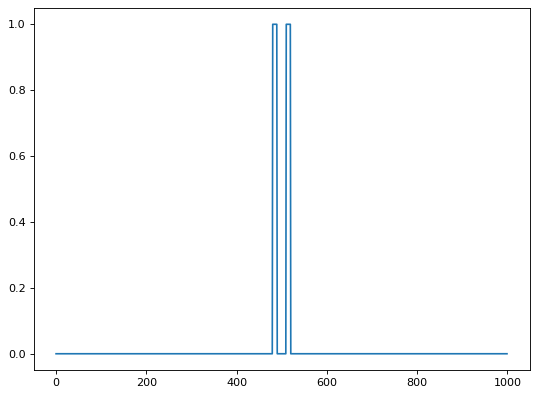

In [77]:
Ih1 = np.zeros(N)
pulsewidth = 10
ds = 10
pdist = lambda_ * pulsewidth * 100

Ih1[int(N/2 - (ds+pulsewidth)):int(N/2 - ds)] = 1
Ih1[int(N/2 + ds):int(N/2 + (ds+pulsewidth))] = 1

plt.plot(Ih1)
pass

In [0]:
# p = Lx / 3
# ztalbot = 2 * p**2 / lambda_
# f = 1 / p
# Ih1 = 1 + np.cos(2 * np.pi * f * np.linspace(-N/2, N/2, N) * dx)
# pdist = 3 * ztalbot

# # dr = 20
# # pulsewidth = p / 15
# # pulseperiods = p * np.linspace(-N/2, N/2, N)

# # for i in range(N):
# #     pass


# plt.plot(Ih1)
# pass

propagation

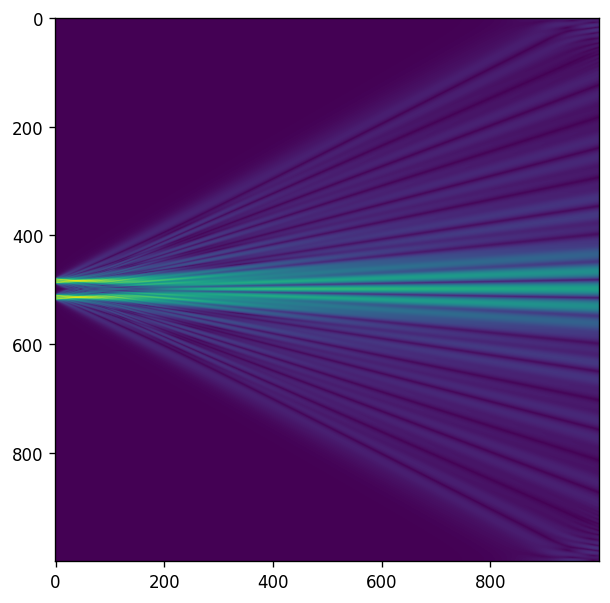

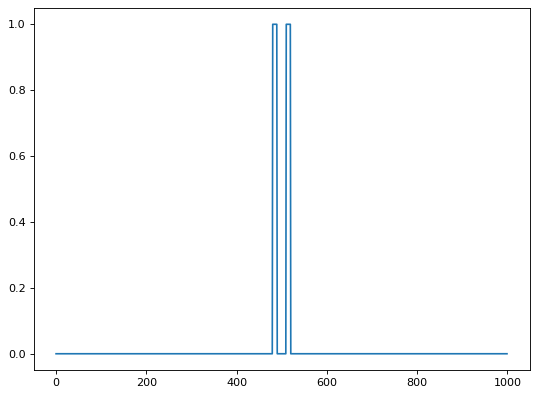

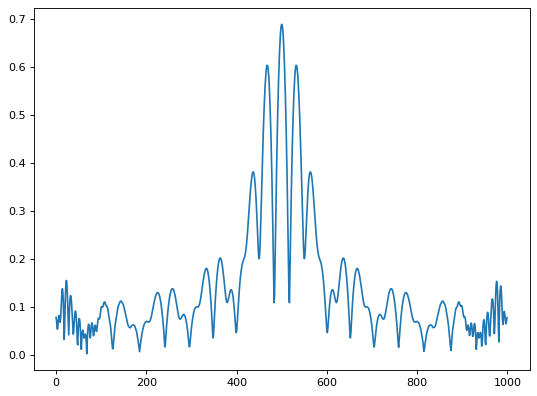

In [79]:
zlist = np.linspace(0, pdist, Nz)

for iz in range(Nz):
    z = zlist[iz]

    H = np.exp(1j * k * z/lambda_ * np.sqrt(1 - (lambda_ * fx)**2))
    H = np.fft.fftshift(H)

    U1 = np.fft.fft(np.fft.fftshift(Ih1))
    U2 = H * U1
    U3 = np.fft.ifftshift(np.fft.ifft(U2.transpose()))

    If[iz] = np.abs(U3)**0.75


plt.figure(dpi=120)
plt.imshow(np.rot90(If)) # extent=[0, 1, 0, 1] If / np.linalg.norm(If))
plt.savefig('out.png')

plt.figure()
plt.plot(If[0])
plt.figure()
plt.plot(If[-1])
pass
